The objective of this notebook is to show how to read and plot data from a mooring (time series).

In [30]:
%matplotlib inline
import netCDF4
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap

# Data reading

The data file is located in the *datafiles* directory.

In [53]:
datadir = './datafiles/'
datafile = 'GL_TS_MO_62164.nc'

As the platform is fixed, we will work on time series.<br/>
We will read the time and the sea water temperature variables, as well as their respective units.

In [54]:
with netCDF4.Dataset(datadir + datafile) as nc:
    time0 = nc.variables['TIME'][:]
    time0_units = nc.variables['TIME'].units
    temperature = nc.variables['TEMP'][:]
    temperature_units = nc.variables['TEMP'].units

In [55]:
print ('Temperature units = %s' %temperature_units)

Temperature units = degree_Celsius


# Basic plot

For a time series, we simply use the [plot function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) of matplotlib.<br/>
Also, we set the font size to 16:

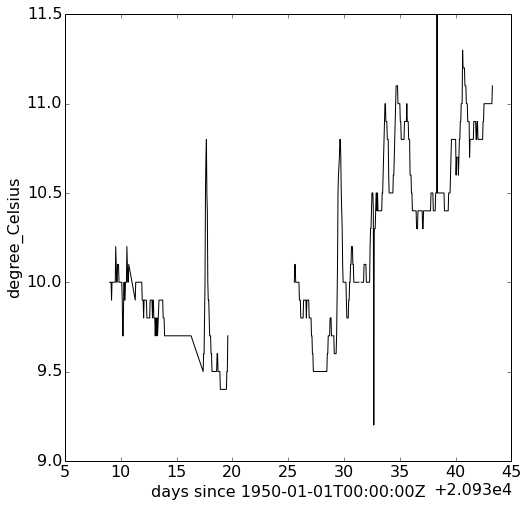

In [57]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(time0, temperature, 'k-')
plt.xlabel(time0_units)
plt.ylabel(temperature_units)
plt.show()

The units set for the time is maybe not the easiest to read.<br/>
However the netCDF4 module offers easy solutions to properly convert the time.

# Converting time units

NetCDF4 provides the function *num2date* to convert the *time* vector into *dates*.<br/>
http://unidata.github.io/netcdf4-python/#section7

In [60]:
from netCDF4 import num2date
dates = num2date(time0, units=time0_units)
print dates[:5]

[datetime.datetime(2007, 5, 1, 0, 0) datetime.datetime(2007, 5, 1, 1, 0)
 datetime.datetime(2007, 5, 1, 2, 0) datetime.datetime(2007, 5, 1, 3, 0)
 datetime.datetime(2007, 5, 1, 4, 0)]


The dates contains [datetime](https://docs.python.org/2/library/datetime.html) objects.

We also extract the platform name from the file:

In [62]:
with netCDF4.Dataset(datadir + datafile) as nc:
    platform_name = nc.platform_name

Finally, to avoid to have the overlap of the date ticklabels, we use the [autofmt_xdate](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.autofmt_xdate) function.<br/> 
Everything is in place to create the improved plot.

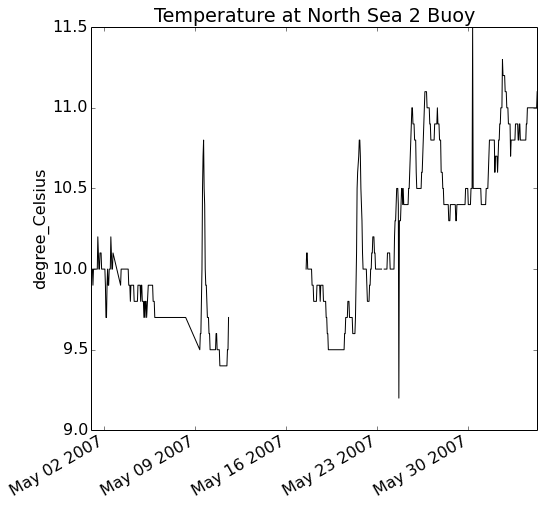

In [63]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(dates, temperature, 'k-')
plt.ylabel(temperature_units)
fig.autofmt_xdate()
plt.title('Temperature at ' + platform_name)
plt.show()